In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("/content/bank.csv",sep=";")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# EDA

In [8]:
df.groupby("y")["age"].mean()

,age
y,
no,40.998000
yes,42.491363


In [9]:
pd.crosstab(df["job"],df["y"], normalize=True)

y,no,yes
job,,
admin.,0.092900,0.012829
blue-collar,0.193984,0.015262
entrepreneur,0.033842,0.003318
housemaid,0.021677,0.003097
management,0.185357,0.028976
retired,0.038929,0.011944
self-employed,0.036054,0.004424
services,0.083831,0.008405
student,0.014377,0.004203


In [10]:
pd.crosstab(df["marital"],df["y"])

y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


In [11]:
pd.crosstab(df["loan"],df["y"],normalize="index")

y,no,yes
loan,,
no,0.875196,0.124804
yes,0.937771,0.062229


<Axes: >

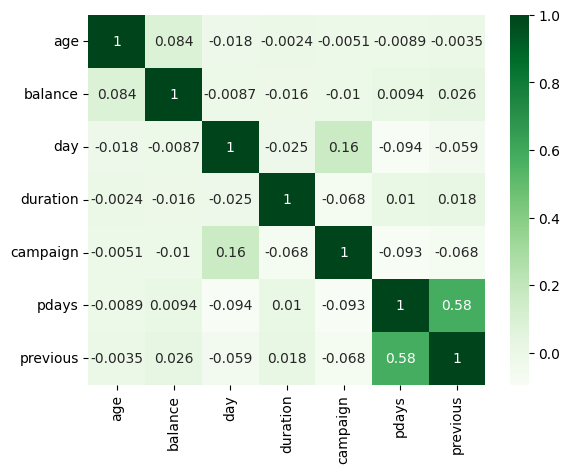

In [12]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True,cmap="Greens")

<Axes: xlabel='age', ylabel='None'>

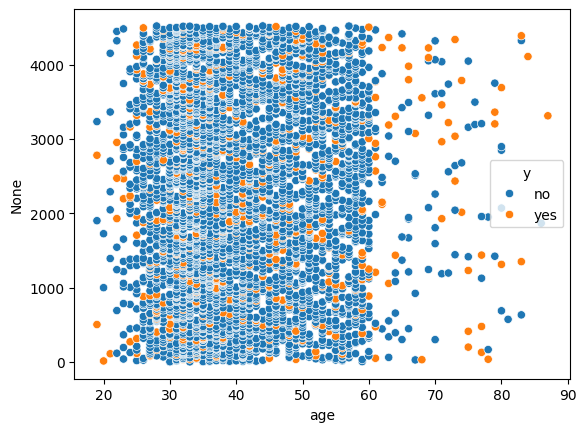

In [13]:
sns.scatterplot(x=df.age,y=df.index,hue=df["y"])

In [14]:
pd.crosstab(df["poutcome"],df["y"],normalize="index")

y,no,yes
poutcome,,
failure,0.871429,0.128571
other,0.807107,0.192893
success,0.356589,0.643411
unknown,0.909042,0.090958


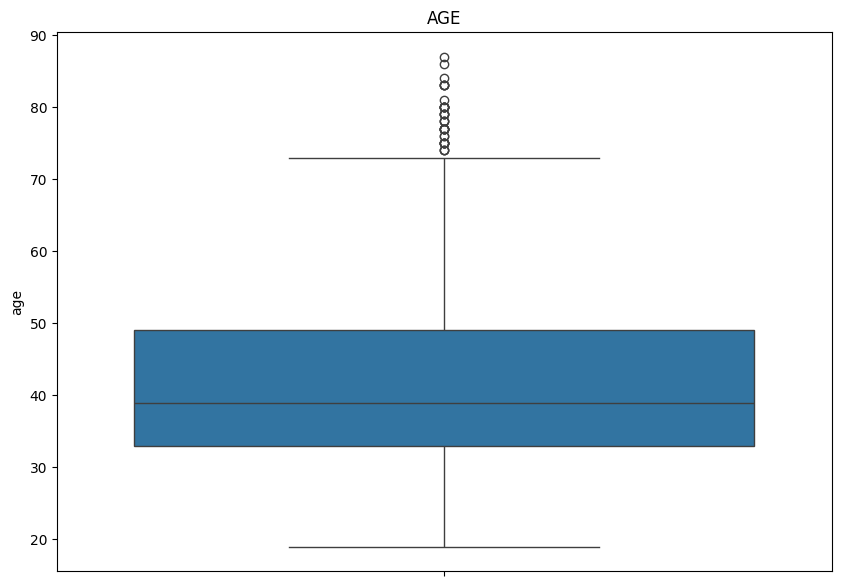

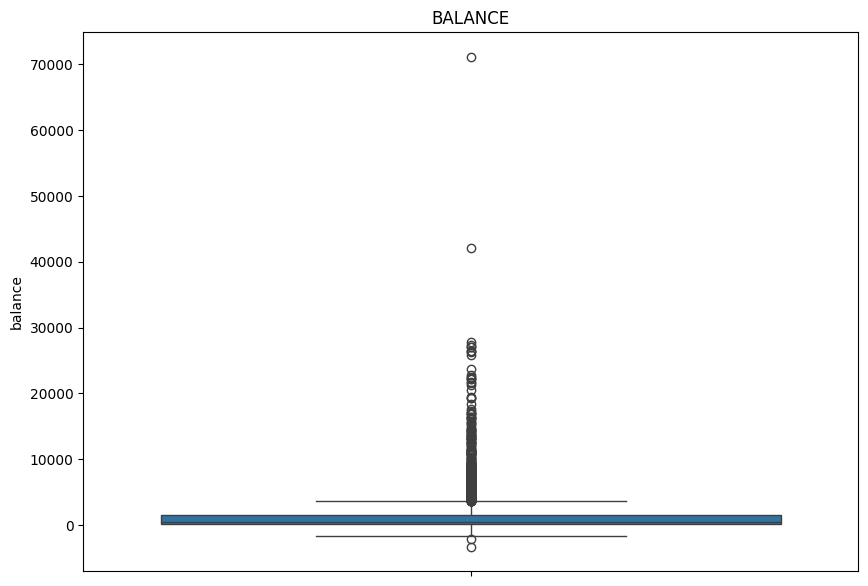

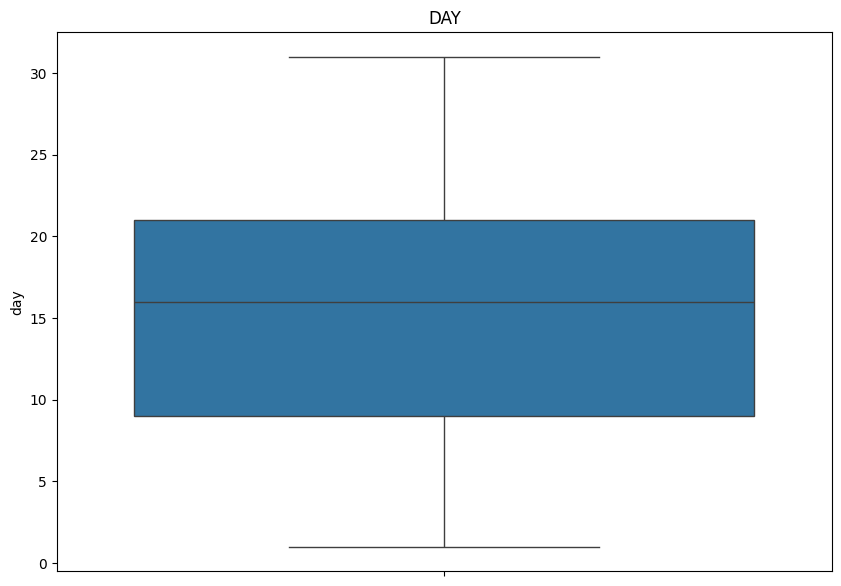

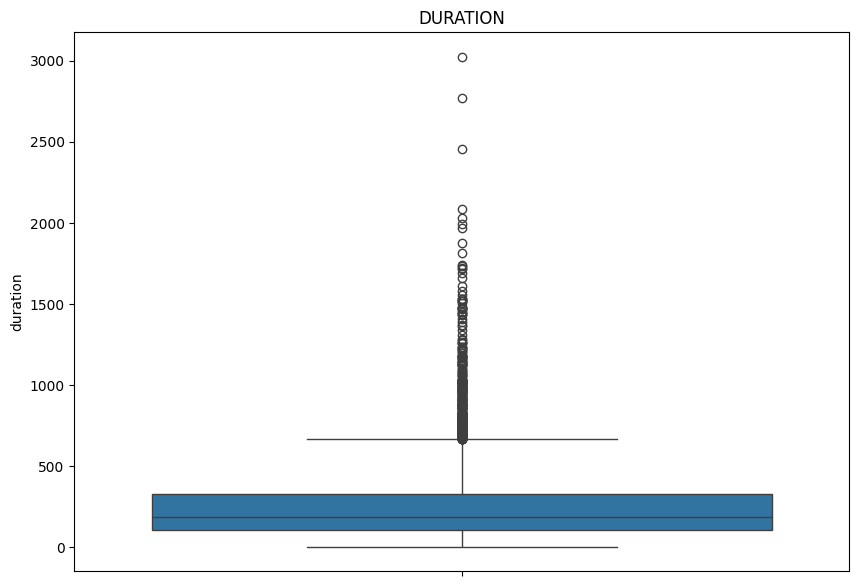

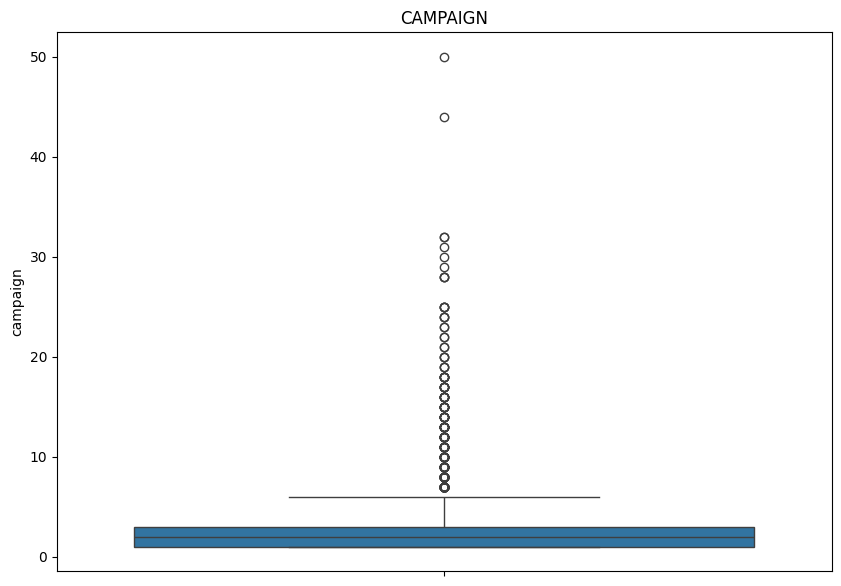

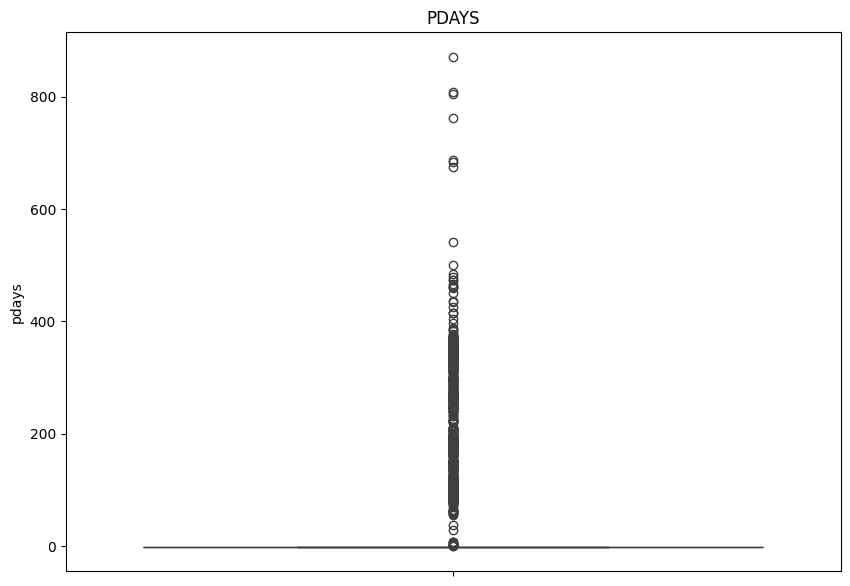

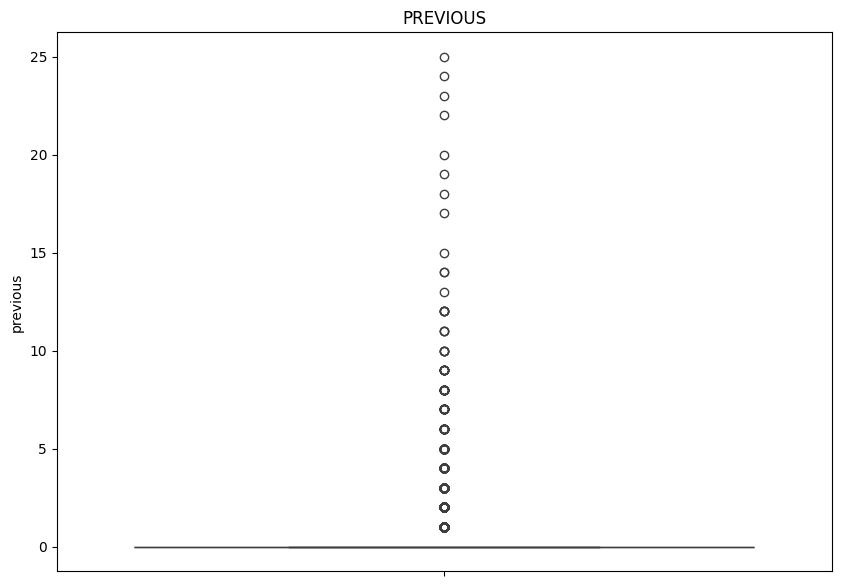

In [15]:
for i in df.select_dtypes("number"):
  plt.figure(figsize=(10,7))
  sns.boxplot(df[i])
  plt.title(i.upper())
  plt.show()

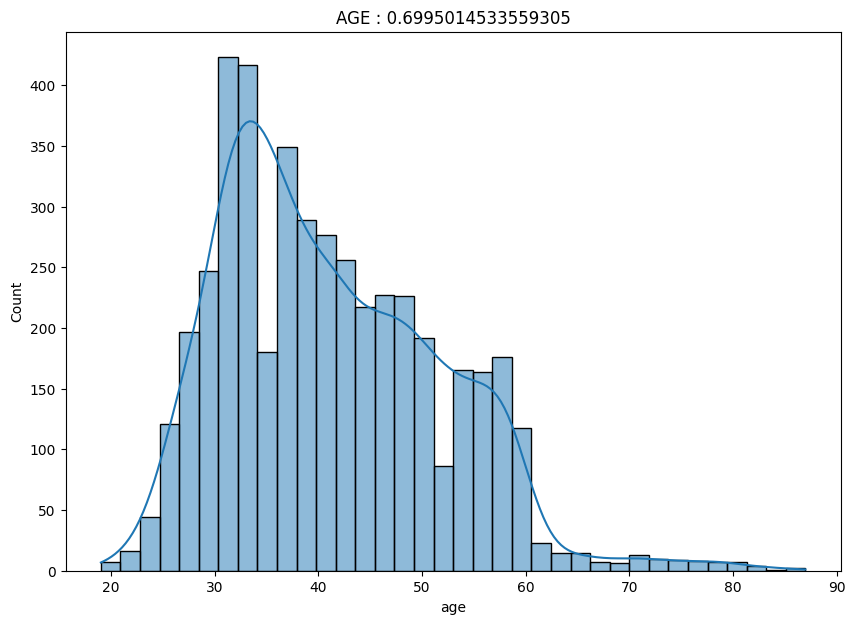

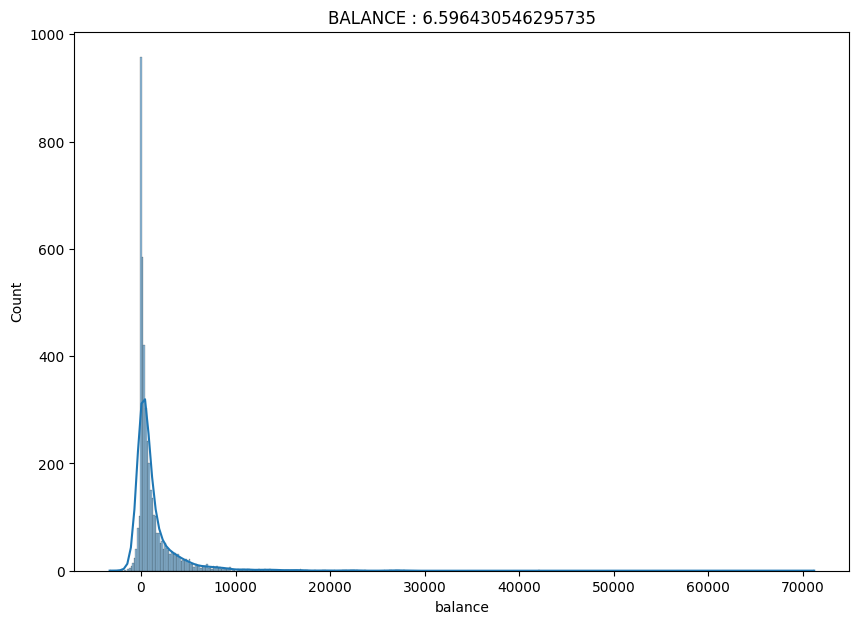

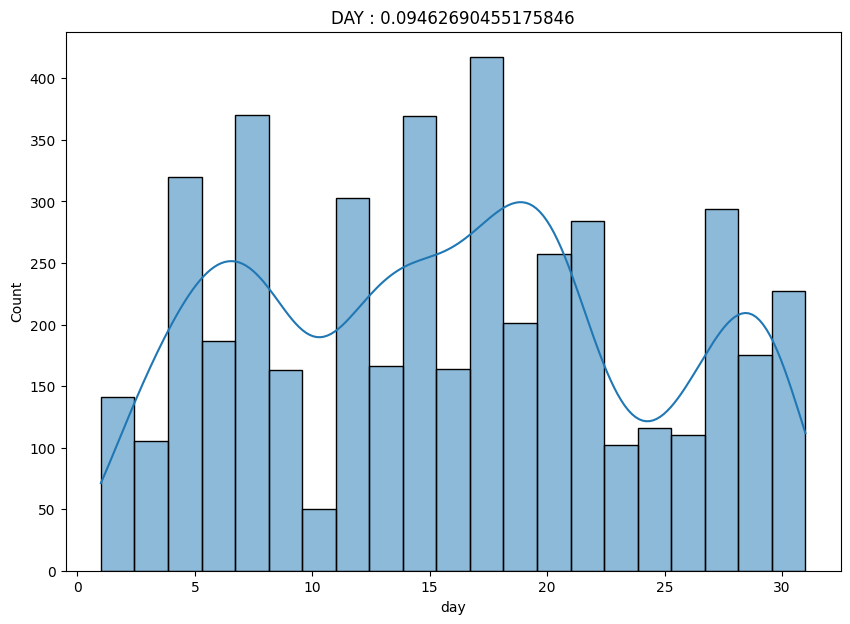

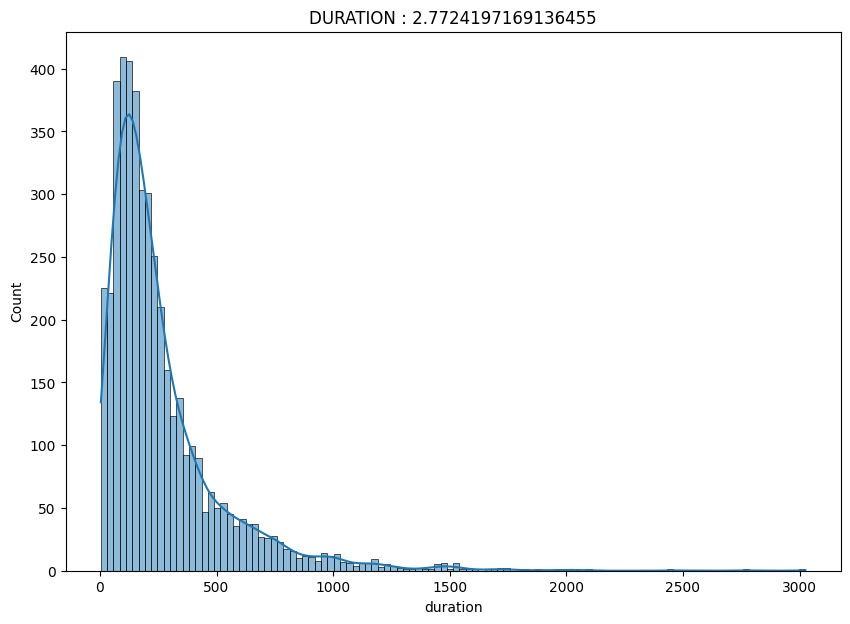

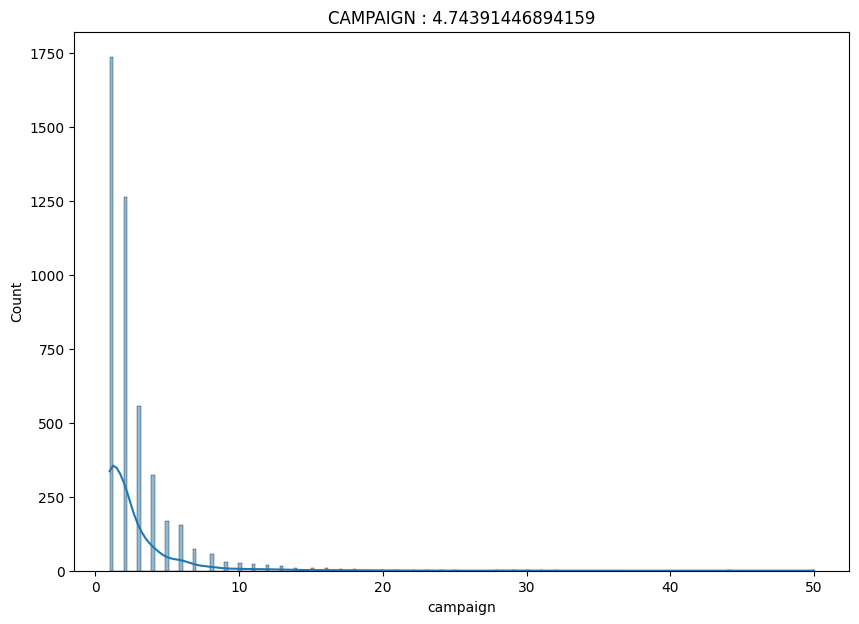

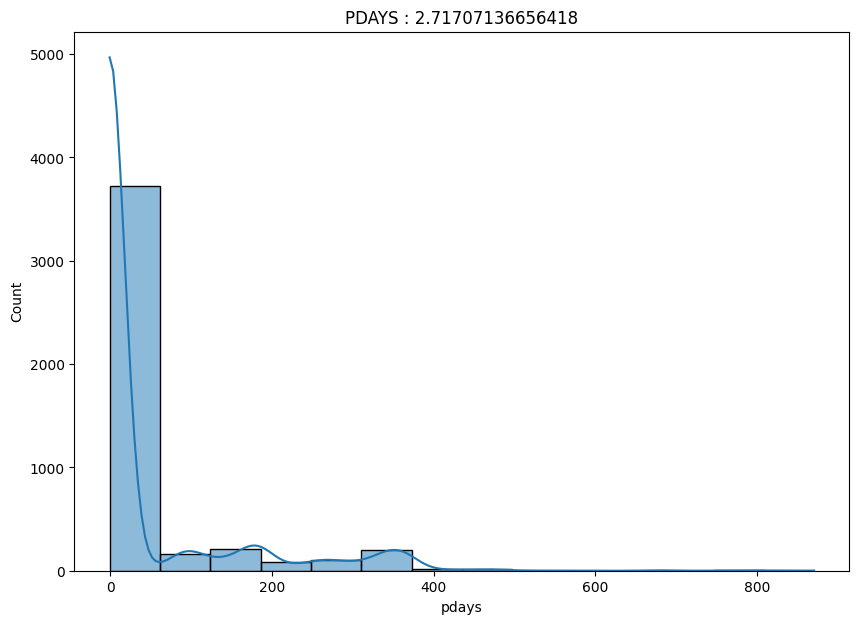

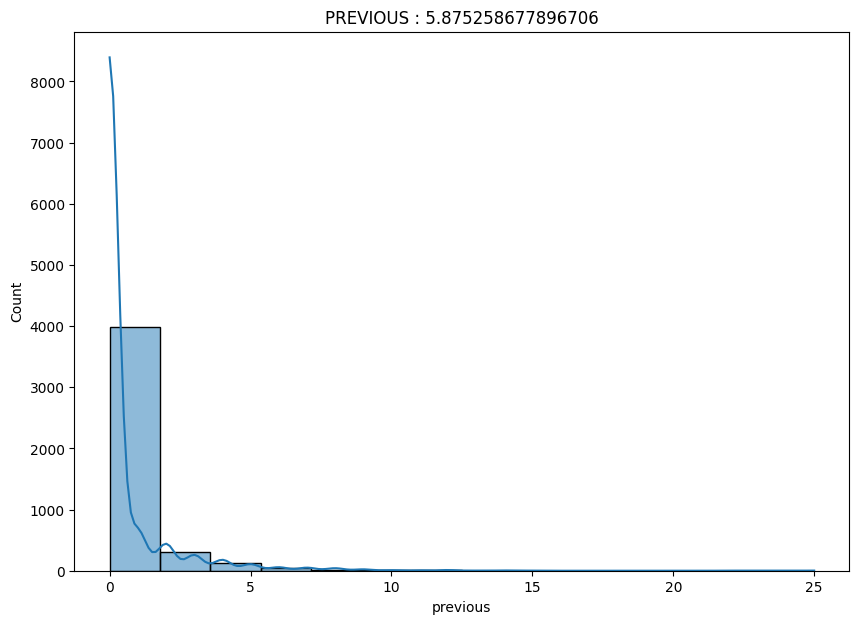

In [16]:
for i in df.select_dtypes("number"):
  plt.figure(figsize=(10,7))
  sns.histplot(df[i],kde=True)
  plt.title(i.upper()+" : "+str(df[i].skew()))
  plt.show()

## Data Preprocessing

In [18]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df.month=df.month.apply(lambda x : month_map[x])

In [24]:
X = df.iloc[:,:-1]
y = LabelEncoder().fit_transform(df.iloc[:,-1])

x_train,x_test,y_train,y_test = train_test_split(X,y)

In [25]:
Col_trans = ColumnTransformer([
 ("Ordinal", OrdinalEncoder(categories=[["tertiary","secondary","primary","unknown"]]),[3]),
 ("Ohe", OneHotEncoder(sparse_output=False,drop="first"),[15,8,2,1,4,6,7],)
],remainder="passthrough")

In [26]:
pipe = Pipeline([
("Col",Col_trans),
("model", DecisionTreeClassifier())
])

In [27]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal',
                                                  OrdinalEncoder(categories=[['tertiary',
                                                                              'secondary',
                                                                              'primary',
                                                                              'unknown']]),
                                                  [3]),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [15, 8, 2, 1, 4, 6, 7])])),
                ('model', DecisionTreeClassifier())])

In [38]:
print("avg accuracy : ",float((cross_val_score(pipe,X,y).mean())))

avg accuracy :  0.8573309538942941


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
y_pred = pipe.predict(x_test)

<Axes: >

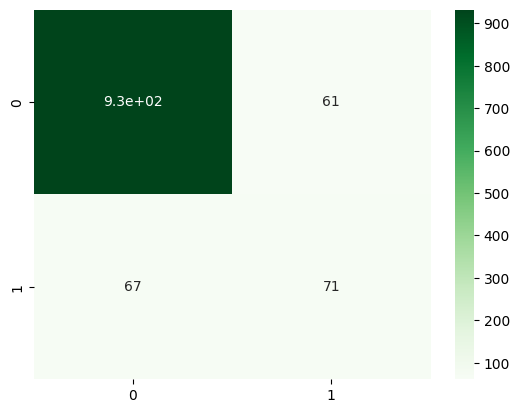

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Greens")

### Insights
* Blue collar and management job employees are more targeted. Whereas, students and retired people show more conversion rates.
* Married, especially older couples make bank term deposit for returns.
* People having loans have lesser conservation rate.(loans and housing may cause multicolinearity, should be treated if we don't use dtc)
*Apparently, 64% successful people pay bank term insurance.